# Input Data

In [1]:
countNA <- function(x=NULL,cutOff=NULL){
  output<-FALSE
  perc<-sum(is.na(x))*100/length(x)
  if(perc>cutOff){output<-TRUE}
  output  
}

In [6]:
path <- "/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideRiaz_AntiPD1CTLA4.csv"
library("limma")
library("edgeR")
data <- read.csv(path, check.names=FALSE, stringsAsFactors=FALSE)
row_nas <- apply(data,1,function(x){countNA(x, 50)})
data <- data[-which(row_nas %in% TRUE),]
# expression matrix
rmc <- c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response", "Source", "PFS", "PFS.Event")
exp <- data[, -which(colnames(data) %in% rmc)]
exp <- t(exp)
# phenotype
sc <- c("Response", "Source")
ph <- data[, which(colnames(data) %in% sc)]
ph$src <- gsub("(.).*", "\\1", ph$Source)
ph$clr <- "green"
ph[ph$src == "R",]$clr <- "red"

ph$clr_res <- "green"
ph[ph$Response == 0,]$clr_res <- "gray"

# Look for batch effects

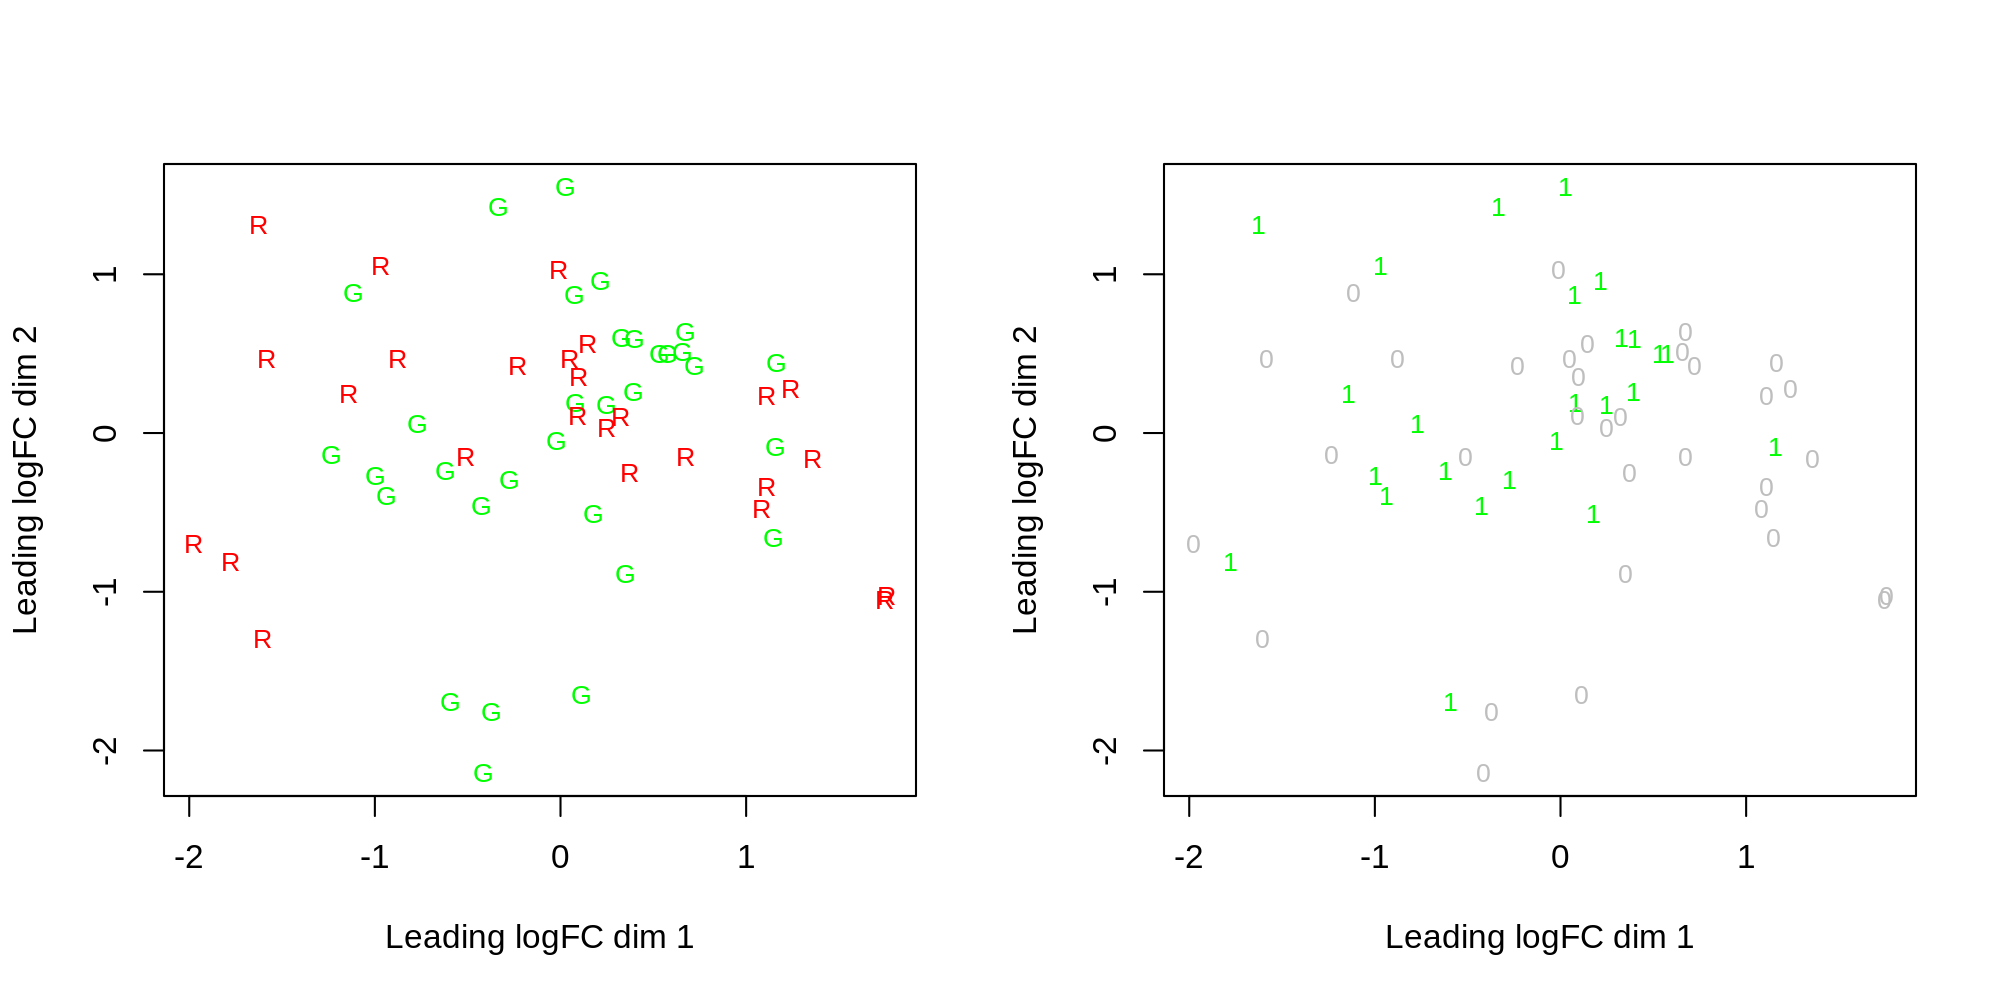

In [7]:
# dge_list <- DGEList(counts=exp, group=as.factor(ph$Source))
options(repr.plot.height=5, repr.plot.width=10, repr.plot.res=200)
par(mfrow=c(1,2))
plotMDS(exp, labels=ph$src, pch=19, col=ph$clr, cex=0.8)
plotMDS(exp, labels=as.character(ph$Response), pch=19, col=ph$clr_res, cex=0.8)

# Differential Expression

`TODO:`
STICK TO EBAYES<br>
Use treat/eBayes(0 Response Source as factors)?<br>
Best way to implement design matrix<br>
Rank on P values<br>
Take top 150/500<br>

In [8]:
#eBayes/ treat
# bayes <- eBayes(lin_mod)
# output <- topTable(lin_mod, number=Inf)
design <- model.matrix(~0+as.factor(ph$Response)+as.factor(ph$Source))
lin_mod <- lmFit(exp,design)
lin_mod <- eBayes(lin_mod)
output <- topTable(lin_mod, number=Inf)
ordered_output <- output[order(output$P.Value),]
# ordered_output
# nrow(ordered_output[ordered_output$P.Value < 0.05, ])
ordered_output[ordered_output$P.Value < 0.05, ]

,as.factor.ph.Response.0,as.factor.ph.Response.1,as.factor.ph.Source.RiazAntiPD1CTLA4,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5031,-0.58380709,0.30580372,0.4868108,0.017871383,9.192973,0.0000450606,0.7410215
54084,0.01987169,-0.01040898,-0.1835863,-0.075477609,7.281638,0.0003139422,0.9999989
2635,-0.80963070,0.42409227,0.7907200,0.076607114,7.075635,0.0003897811,0.9999989
30832,0.47542303,-0.24903111,-0.5474081,-0.082231542,6.720549,0.0005678821,0.9999989
80832,-0.81287415,0.42579122,0.6882314,0.029550855,6.400845,0.0007998398,0.9999989
926,-0.81988808,0.42946518,0.7746265,0.065872634,6.381450,0.0008167249,0.9999989
574029,0.05970827,-0.03127576,-0.2693939,-0.100271786,6.350257,0.0008446535,0.9999989
5023,-0.40772012,0.21356768,0.2647486,-0.021243261,6.151533,0.0010472519,0.9999989
3620,-1.35631957,0.71045311,1.0541095,0.007062553,6.077093,0.0011354794,0.9999989


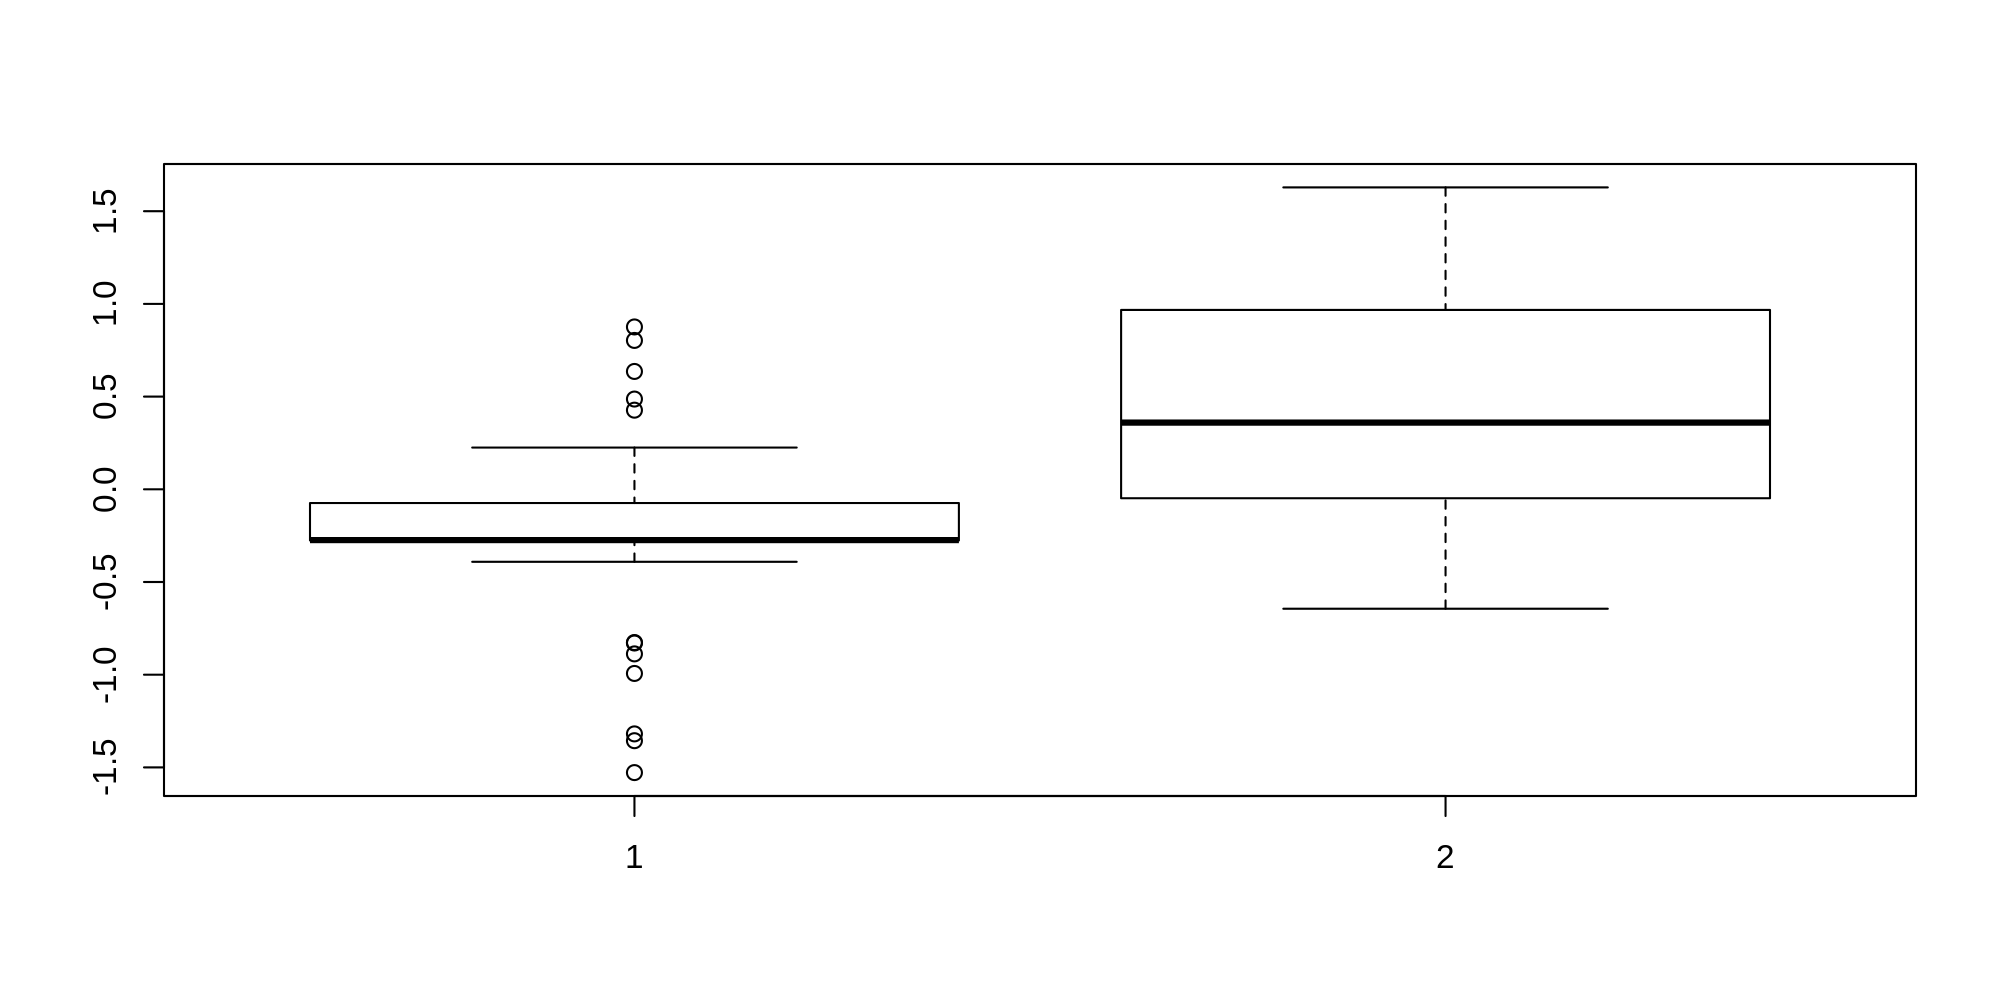

In [9]:
a <- exp["5031", ]
b <- ph$clr_res
c <- data.frame(expr=a, clr=b, stringsAsFactors=FALSE)
c <- c[order(c$clr),]
boxplot(c[c$clr=="gray",]$expr, c[c$clr=="green",]$expr)

# Overlap ML vs DiffEx

In [10]:
# set.seed(123)
n.rnd <- 100
n.itr <- 100
ord.gl <- rownames(ordered_output)
ml.gl <- ord.gl[1:1000][sample(1000, 100)]  # change this
# ml.gl <- readRDS("/home/jp/ICP_Responders/ML/GideRiaz_AntiPD1CTLA4/Pre-processingFeatureSelection/ml.list.rds")
rnd.list <- list()
for(i in 1:n.itr){
    rnd.pos <- sample(nrow(output), n.rnd)  # index 
    rnd.gl <- rownames(output)[rnd.pos]
    perc.rnd.gl <- c(length(which(rnd.gl %in% ord.gl[1:100])),
                     length(which(rnd.gl %in% ord.gl[1:200])),
                     length(which(rnd.gl %in% ord.gl[1:300])),
                     length(which(rnd.gl %in% ord.gl[1:400])),
                     length(which(rnd.gl %in% ord.gl[1:500])),
                     length(which(rnd.gl %in% ord.gl[1:600])),
                     length(which(rnd.gl %in% ord.gl[1:700])),
                     length(which(rnd.gl %in% ord.gl[1:800])),
                     length(which(rnd.gl %in% ord.gl[1:900])),
                     length(which(rnd.gl %in% ord.gl[1:1000]))
                     )*100/length(rnd.gl)
    rnd.list[[i]] <- perc.rnd.gl
}
rnd.mat <- do.call(rbind, rnd.list)

#
perc.ml.gl <- c(length(which(ml.gl %in% ord.gl[1:100])),
                 length(which(ml.gl %in% ord.gl[1:200])),
                 length(which(ml.gl %in% ord.gl[1:300])),
                 length(which(ml.gl %in% ord.gl[1:400])),
                 length(which(ml.gl %in% ord.gl[1:500])),
                 length(which(ml.gl %in% ord.gl[1:600])),
                 length(which(ml.gl %in% ord.gl[1:700])),
                 length(which(ml.gl %in% ord.gl[1:800])),
                 length(which(ml.gl %in% ord.gl[1:900])),
                 length(which(ml.gl %in% ord.gl[1:1000]))
                 )*100/length(ml.gl)

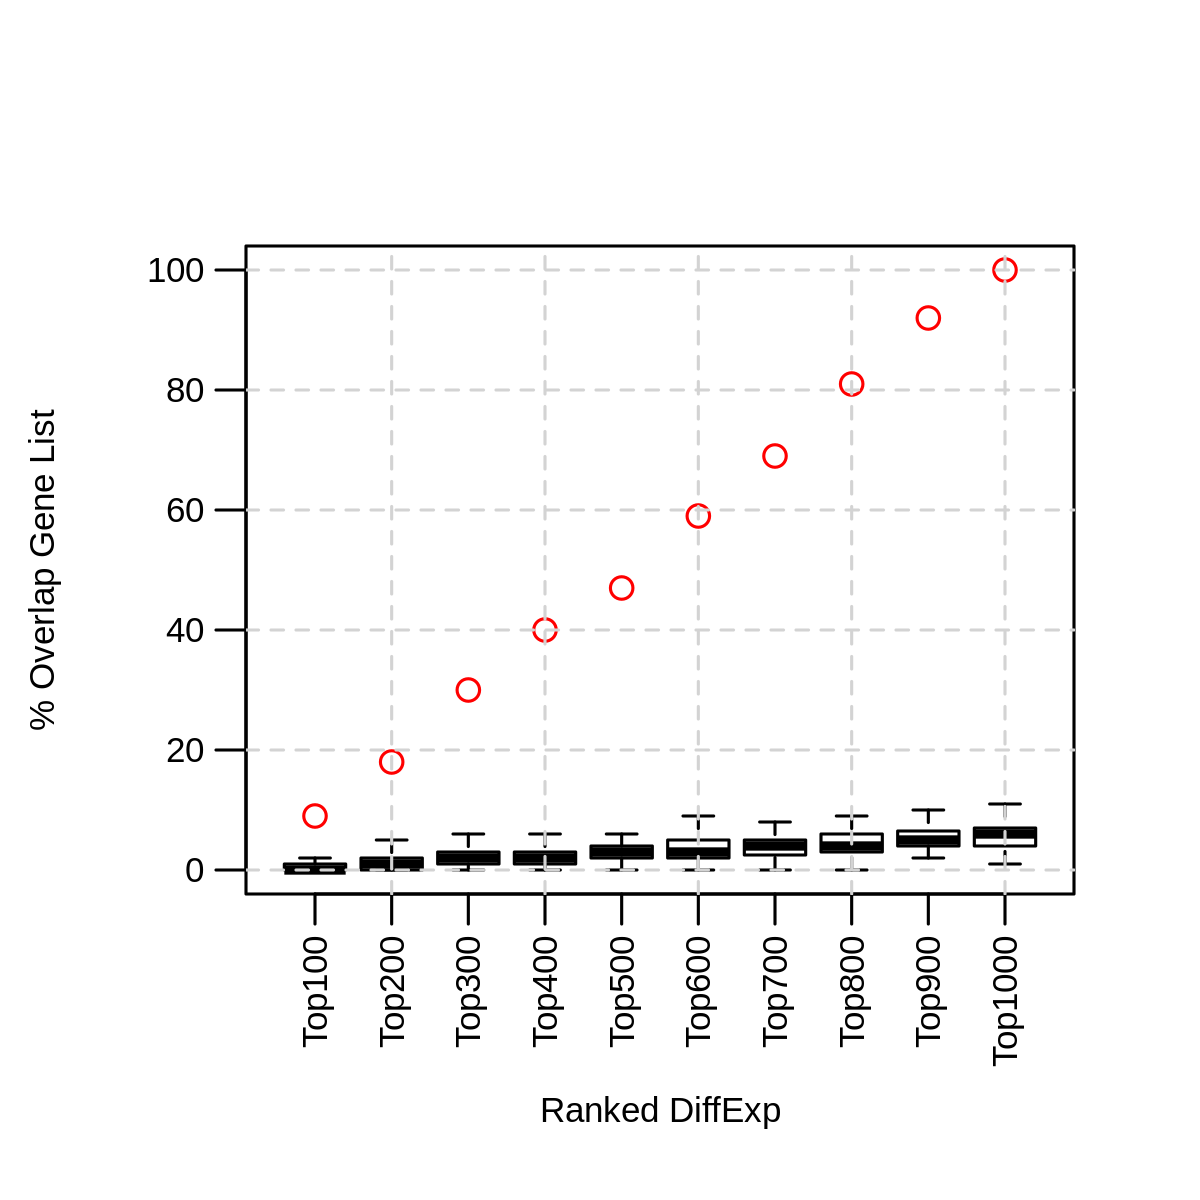

In [11]:
# par(mfrow=c(2, 1))
par(mgp=c(3, 0.7, 0), cex.lab=0.7)
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
boxplot(rnd.mat, outline=FALSE, names=c("Top100","Top200", "Top300", "Top400", "Top500","Top600",
                                       "Top700", "Top800", "Top900","Top1000"), 
        xlab= "Ranked DiffExp", 
        ylab = "% Overlap Gene List",
        ylim=c(0,100),
        las = 2,
        cex.axis=0.7)
points(perc.ml.gl, col="red")
grid(lty="dashed")
# axis(1, at=1:10, labels=c("Top100","Top200", "Top300", "Top400", "Top500","Top600",
#                            "Top700", "Top800", "Top900","Top1000"))
# axis(2, at=c(0, 20, 40, 60, 80, 100), labels=c("0", "20", "40", "60", "80", "100"))

what fration of 200 ML genes fall within ranked n number of DE genes -> red dot
what fraction of 200 random genes fall within ranked n number of DE genes(100 iterations) -> boxplot